effect of larger B and smaller A on egfrd (R remains 0.01)

In [ ]:
from ecell4 import *
from ecell4.extra import ensemble
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

simrun=5000
duration = 1000
#rm = 0.005
D=0.1
Nas = 5
nproc=None
L=1#cbrt(10)
k0= 0.1
method='multiprocessing'

for rm in [0.005]:
    def write(name,obs):
        f=open(name,'w')
        data = np.array(obs.data()).T
        np.savetxt(name,np.column_stack([data[0],data[1]]),delimiter=',',fmt='%s')
        f.close()
        print('saving into',name)

    def singlerun(solver='ode',intrinsic=False,simrun=1):   
        print(solver)
        V = L**3 
        M = max(int(min(cbrt(Nas), L / (2 * rm))), 3)
        if solver=='spa':
            solver=("spatiocyte",rm)
            V=spatiocyte.SpatiocyteWorld.calculate_volume(Real3(L,L,L),rm)
        elif solver=='egfrd':
            solver = ('egfrd', Integer3(M, M, M)) 

        kon=k0/V        
        keff = kon*V*V/Nas
        kd = 4*np.pi*rm*2*D*2
        ka = keff*kd/(kd-keff)
        assert(ka>0)
        with species_attributes():
            A | {'D': D, 'radius':0.005}
            B | {'D': D, 'radius':0.095}

        with reaction_rules():
            ~A > A | kon
            A + B >B | (ka if intrinsic else keff)
        m = get_model()

        print('av={:.3},intrinsic={}'.format(float(V),intrinsic))
        print('kon={:.3},koff={:.3},kd={:.3},keff={:.3},kfactor={:.3}'.format(kon,(ka if intrinsic else keff),kd,keff,ka/kd))
        if simrun >1    :
            obs=ensemble.ensemble_simulations(duration,n=simrun, y0={'B':1},model=m, solver=solver,volume=ones()*L,species_list=["A"],return_type='observer',nproc=nproc,method=method)#,return_type="observer")
        else:
            obs=run_simulation(duration,model=m,y0={'B':1},return_type='observer',species_list=['A'],solver=solver,volume=ones()*L)
        return obs


    #obs1=singlerun('ode',False,1)
    #obs2=singlerun('spa',True,simrun)
    obs3=singlerun('egfrd',True,simrun)
    #write('/home/chew/outputdata/sturrock_bd_ode_rm{:.3}'.format(rm),obs1)
    #write('/home/chew/outputdata/sturrock_bd_spa_rm{:.3}_run2'.format(rm),obs2)
    write('/home/chew/outputdata/sturrock_bd_egfrd_rm{:.3}_largerBsmallerA'.format(rm),obs3)

egfrd
av=1.0,intrinsic=True
kon=0.1,koff=0.0979,kd=0.0251,keff=0.02,kfactor=3.9


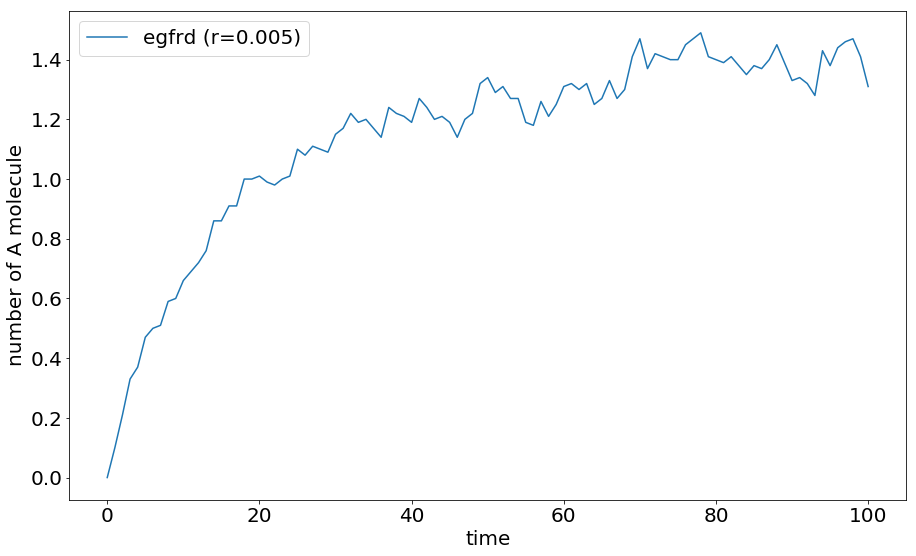

In [3]:
fig=plt.figure()
data3 = np.array(obs3.data()).T
plt.plot(data3[0], data3[1],'-', label='egfrd (r={})'.format(rm))
plt.legend(loc='best',fontsize=20)
fig.set_size_inches(15, 9)
plt.tick_params(labelsize=20)
s=20
plt.xlabel('time',fontsize=s)
plt.ylabel('number of A molecule',fontsize=s)
#plt.title('L={},D={},kd={:3},keff={:3},ka_Spa={:3},ka_eGFRD={:3}'.format(L,D,0.126,0.02,0.025,0.024),fontsize=s)
#plt.savefig('/home/chew/ecellwork/figure/sturrock_birth_death_1')

0.005
spa mean 4.967844
egfrd mean 4.88968
0.05
spa mean 4.821624
egfrd mean 4.727704


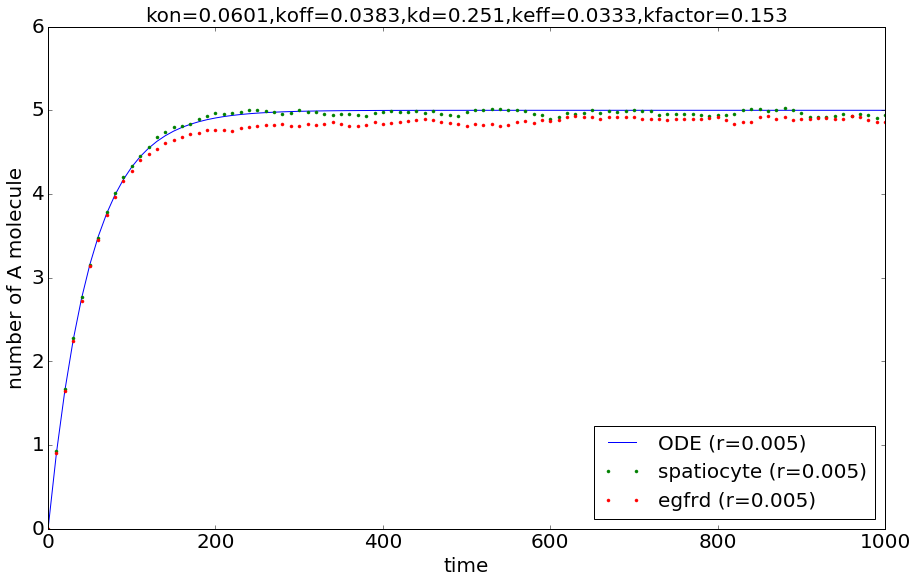

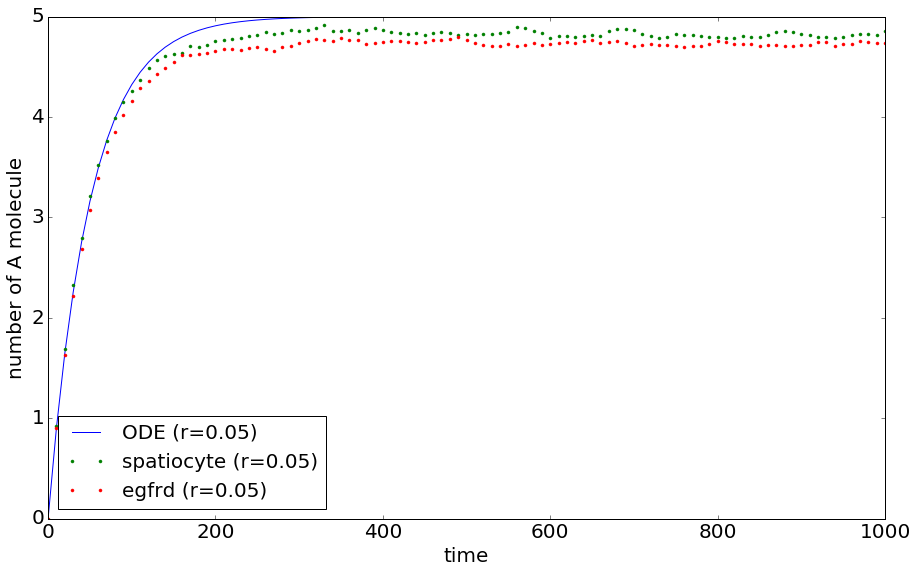

In [28]:
rm=0.005
for rm in [0.005,0.05]:
    dat1=np.genfromtxt('/home/chew/outputdata/sturrock_bd_ode_rm{}'.format(rm),delimiter=',',dtype='str')
    dat2=np.genfromtxt('/home/chew/outputdata/sturrock_bd_spa_rm{}'.format(rm),delimiter=',',dtype='str')
    dat3=np.genfromtxt('/home/chew/outputdata/sturrock_bd_egfrd_rm{}'.format(rm),delimiter=',',dtype='str')
    fig=plt.figure()
    plt.plot(dat1[:,0],dat1[:,1], label='ODE (r={})'.format(rm))
    plt.plot(dat2[:,0],dat2[:,1],'.', label='spatiocyte (r={})'.format(rm))
    plt.plot(dat3[:,0],dat3[:,1],'.', label='egfrd (r={})'.format(rm))
    print(rm)
    print('spa mean',np.mean([float(i) for i in dat2[:,1][-50:]]))
    print('egfrd mean',np.mean([float(i) for i in dat3[:,1][-50:]]))
    plt.tick_params(labelsize=20)
    s=20
    plt.legend(loc='best',fontsize=20)
    plt.xlabel('time',fontsize=s)
    if rm==0.005:
        plt.title('kon=0.0601,koff=0.0383,kd=0.251,keff=0.0333,kfactor=0.153',fontsize=s)
    plt.ylabel('number of A molecule',fontsize=s)
    fig.set_size_inches(15, 9)

In [20]:
print(data3[1])
[float(i) for i in dat3[:,1]]

[ 0.      0.9088  1.6458  2.2386  2.717   3.1444  3.4504  3.7458  3.9582
  4.1612  4.2788  4.402   4.4826  4.5398  4.6052  4.6432  4.6806  4.7116
  4.7338  4.7698  4.76    4.768   4.752   4.7842  4.7974  4.8068  4.827
  4.8288  4.8346  4.8144  4.8148  4.833   4.8246  4.831   4.8614  4.8338
  4.8166  4.8102  4.824   4.8544  4.836   4.8486  4.8612  4.8748  4.8832
  4.897   4.884   4.8596  4.8456  4.8404  4.8118  4.8366  4.83    4.8404
  4.8122  4.8284  4.857   4.8672  4.8522  4.8892  4.8696  4.8896  4.9168
  4.9298  4.9194  4.9186  4.9014  4.9228  4.9246  4.9246  4.9254  4.8988
  4.8962  4.8936  4.8866  4.8916  4.8928  4.8908  4.8968  4.9094  4.915
  4.8856  4.8358  4.865   4.8652  4.92    4.9296  4.8946  4.9174  4.886
  4.899   4.9004  4.9022  4.9124  4.8934  4.9008  4.927   4.9238  4.8828
  4.8584  4.8572]


[0.0,
 0.9088,
 1.6458,
 2.2386,
 2.717,
 3.1444,
 3.4504,
 3.7458,
 3.9582,
 4.1612,
 4.2788,
 4.402,
 4.4826,
 4.5398,
 4.6052,
 4.6432,
 4.6806,
 4.7116,
 4.7338,
 4.7698,
 4.76,
 4.768,
 4.752,
 4.7842,
 4.7974,
 4.8068,
 4.827,
 4.8288,
 4.8346,
 4.8144,
 4.8148,
 4.833,
 4.8246,
 4.831,
 4.8614,
 4.8338,
 4.8166,
 4.8102,
 4.824,
 4.8544,
 4.836,
 4.8486,
 4.8612,
 4.8748,
 4.8832,
 4.897,
 4.884,
 4.8596,
 4.8456,
 4.8404,
 4.8118,
 4.8366,
 4.83,
 4.8404,
 4.8122,
 4.8284,
 4.857,
 4.8672,
 4.8522,
 4.8892,
 4.8696,
 4.8896,
 4.9168,
 4.9298,
 4.9194,
 4.9186,
 4.9014,
 4.9228,
 4.9246,
 4.9246,
 4.9254,
 4.8988,
 4.8962,
 4.8936,
 4.8866,
 4.8916,
 4.8928,
 4.8908,
 4.8968,
 4.9094,
 4.915,
 4.8856,
 4.8358,
 4.865,
 4.8652,
 4.92,
 4.9296,
 4.8946,
 4.9174,
 4.886,
 4.899,
 4.9004,
 4.9022,
 4.9124,
 4.8934,
 4.9008,
 4.927,
 4.9238,
 4.8828,
 4.8584,
 4.8572]

In [16]:
def simplef(x):
    return x**10

ensemble.run_multiprocessing(jobs=,n=5,nproc=5,target=simplef)

ImportError: cannot import name 'run_multiprocessing'